In [1]:
from triqs.operators import *
from triqs_cthyb import Solver

# from triqs.gf import  MeshImTime, MeshReFreq, iOmega_n, inverse, GfLegendre, MeshImFreq, Gf, GfImFreq, GfImTime, Fourier
from triqs.gf import *
from triqs.gf.descriptors import MatsubaraToLegendre
# from triqs.plot.mpl_interface import plt
from triqs_tprf.ParameterCollection import ParameterCollection


from h5 import *
from functools import partial
from multiprocessing import Pool, Manager
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from  tqdm import tqdm
import sys

import torch
import torch.nn as nn

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'


Starting serial run at: 2024-10-30 13:09:38.872191


In [20]:
sys.path.append("./src")
%load_ext autoreload
%autoreload 2
import DataBase
import ml_model
import Sample
from util import *

from ml_model import MLSolver   
from DMFT_routins import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Prepare dataset

In [3]:

beta = [5., 20.]
U = [1.0, 5.0]
n_entries = 8 #16 -> 20 min
filename ='./data/databaseV13.h5'

DB_get = DataBase.db_DMFT(beta, U, n_entries, filename)

DB_get.solve_db(n_workers=4)
DB_get.save_db()

model loaded from ./models/AUTOmodel_v4


100%|██████████| 8/8 [00:00<00:00, 1166.06it/s]


--> DMFT Iteration: 0
--> DMFT Iteration: 0
--> DMFT Iteration: 0
--> DMFT Iteration: 0

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
0.0619745*c_dag('dn',0)*c('dn',0) + 0.0619745*c_dag('up',0)*c('up',0) + 4.9193*c_dag('dn',0)*c_dag('up',0)*c('up',0)*c('dn',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
0.010681*c_dag('dn',0)*c('dn',0) + 0.010681*c_dag('up',0)*c('up',0) + 3.77482*c_dag('dn',0)*c_dag('up',0)*c('up',0)*c('dn',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
0.00696186*c_dag('dn',0)*c('dn',0) + 0.00696186*c_dag('up',0)*c('up',0) + 4.198

TRIQS : Received signal TRIQS : Received signal TRIQS : Received signal TRIQS : Received signal 1515

1515

mc_generic: Signal caught on node mc_generic: Signal caught on node 0mc_generic: Signal caught on node 0

0





mc_generic stops because of a signal
mc_generic stops because of a signalmc_generic stops because of a signal
mc_generic stops because of a signal

Total number of measures: 82398
Average sign: 1
Average order: 5.59883
Auto-correlation time: 5.55094
Total number of measures: 102861
Average sign: 1
Average order: 2.55519
Auto-correlation time: 2.1049
Total number of measures: Total number of measures: 89486
Average sign: 94052
1Average sign: 
Average order: 1
4.95795Average order: 
5.09792Auto-correlation time: 
Auto-correlation time: 4.95792
7.42184

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
0.0619734*c_dag('dn',0)*c('dn',0) + 0.0619734*c_dag('up',0)*c('up',0) + 4.9193*c_dag('dn',0)*c_dag('up',0)*c('up',0)*c('dn',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─

# Results

In [3]:
filename ='./data/databaseV16.h5'
DB = DataBase.db_DMFT.fromh5(filename)

100%|██████████| 60/60 [00:00<00:00, 263516.48it/s]


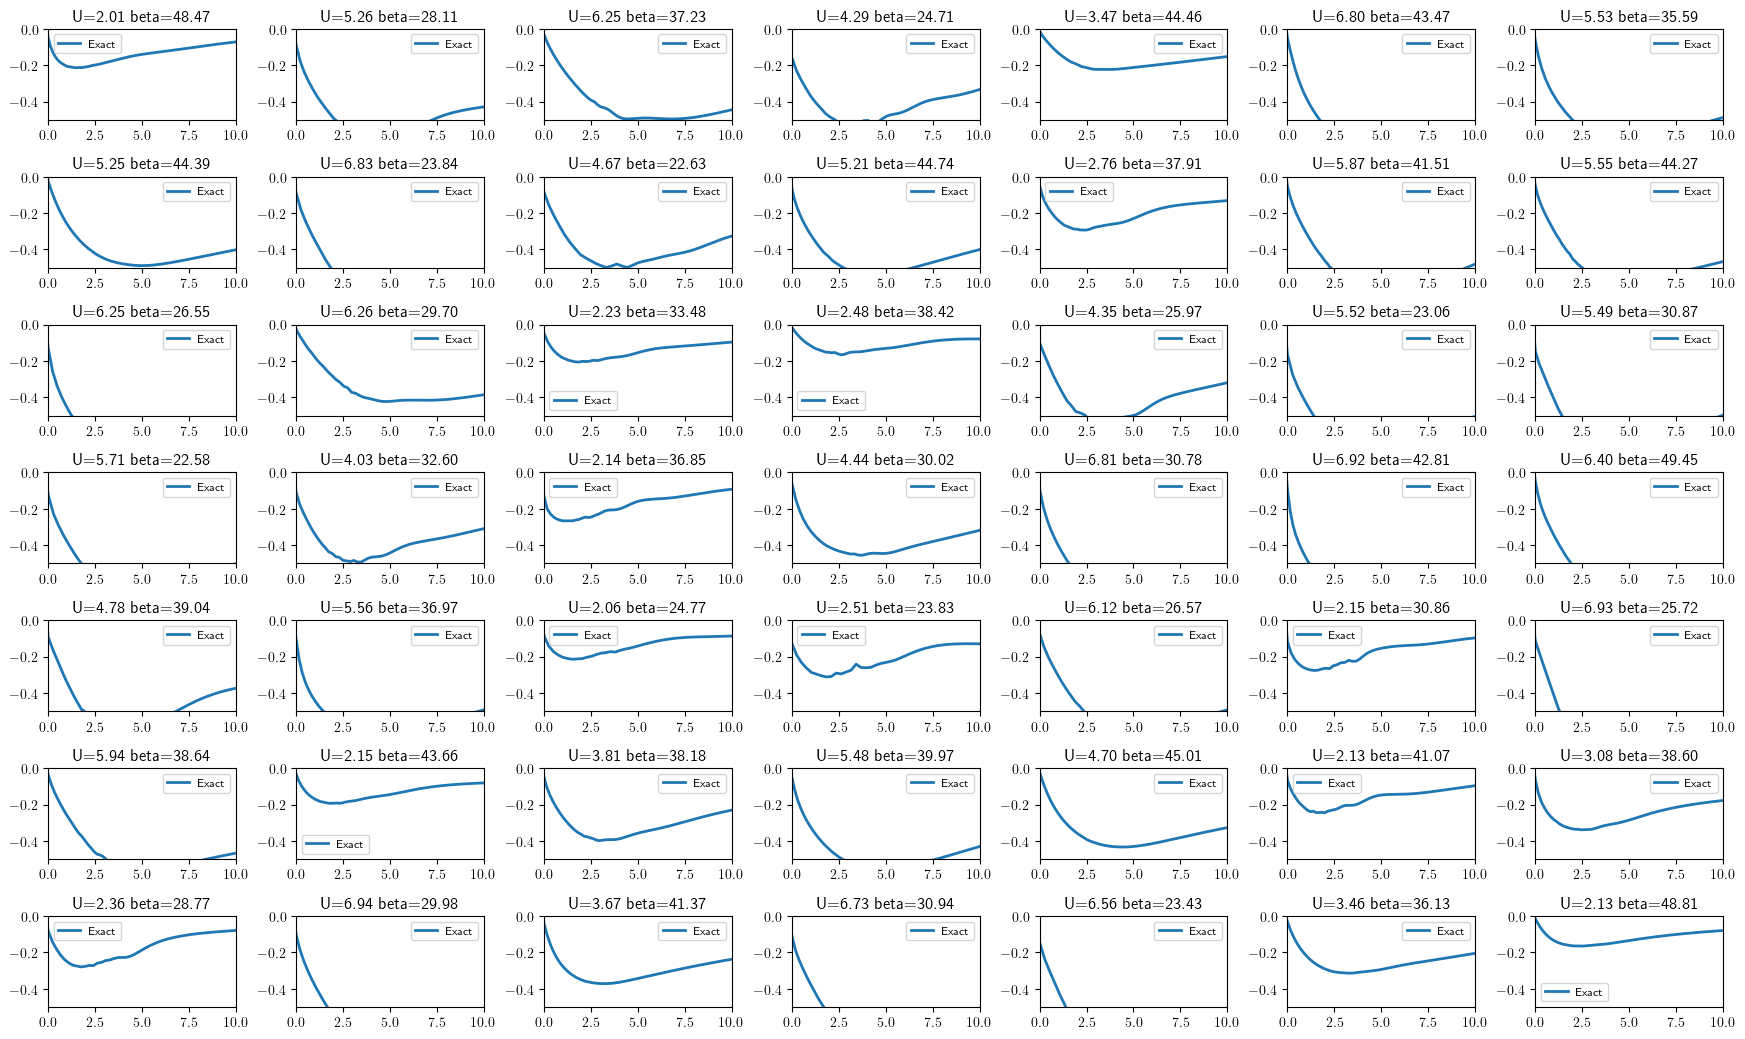

In [4]:
DB.plot_SE(7, 7)

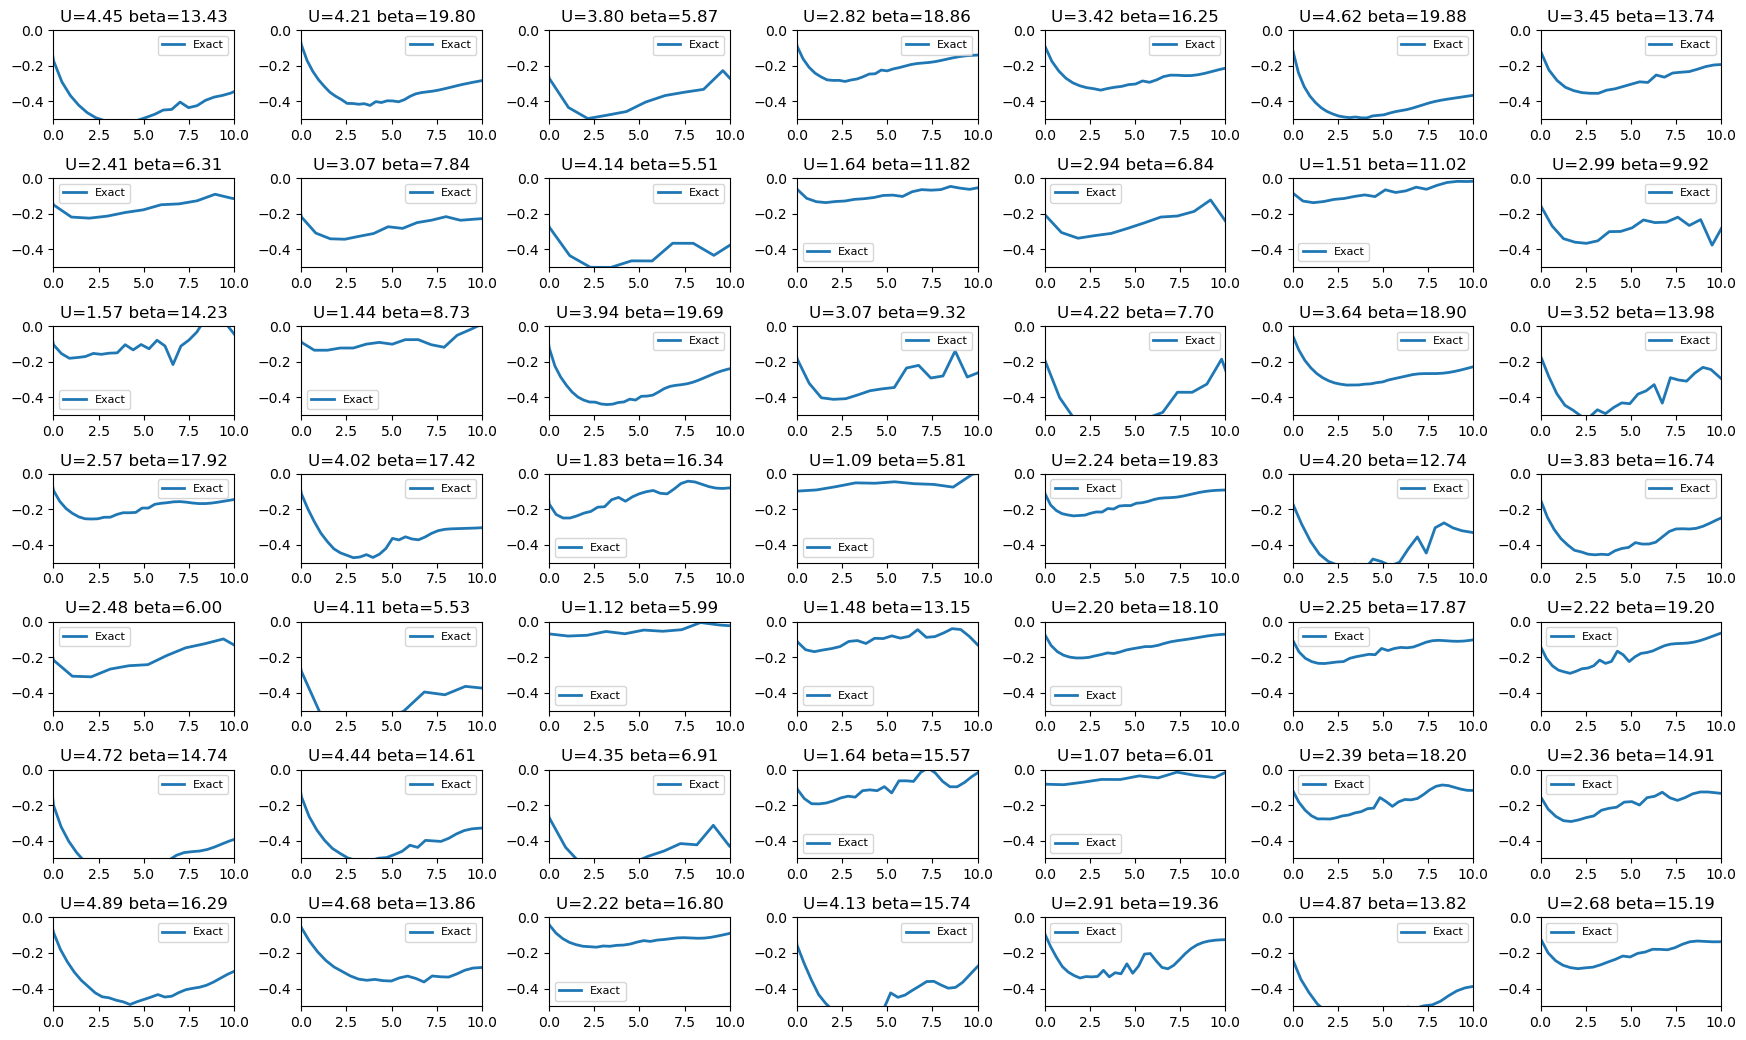

In [27]:
DB.plot_SE(7, 7)

# Apply ML

In [ ]:
filename ='./data/databaseV14.h5'
DB = DataBase.db_DMFT.fromh5(filename)
# DB.plot_SE(7, 7)

In [14]:
model_path='./models/model_v4'
MLmodel = MLSolver().to(device, torch.float32)
MLmodel.load_checkpoint(checkpoint_path=model_path)


model_path='./models/model_v3'
MLmodel_v3 = MLSolver().to(device, torch.float32)
MLmodel_v3.load_checkpoint(checkpoint_path=model_path)


model loaded from ./models/model_v4
model loaded from ./models/model_v3


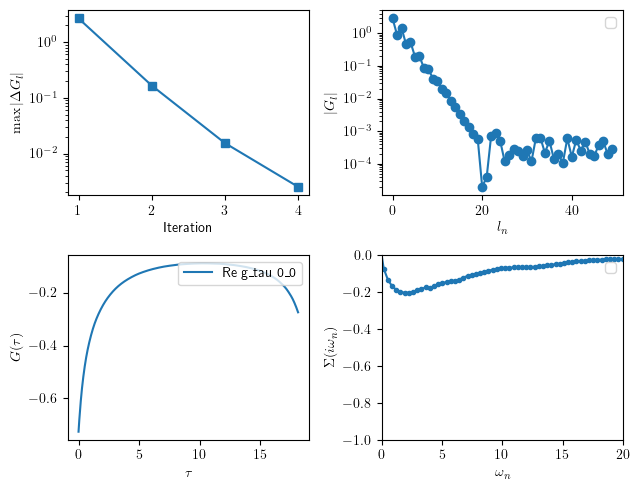

In [9]:
sample = DB.data_entries[32]
plot_DMFT_test(sample.ps_exact)

In [10]:
p = ParameterCollection(
    # t = 1.,
    # B = 0.,
    U = sample.U,
    mu = 0.,
    n_k = 10,
    n_iter = 7,
    G_l_tol = 5e-3
    )

p.solve = ParameterCollection(
    length_cycle = 15,
    n_warmup_cycles = 3000,
    n_cycles = int(5e6),
    move_double = False,
    measure_G_l = True,
    verbosity= 2
    )

p.init = ParameterCollection(
    beta = sample.beta,
    n_l = 30,
    n_iw = 400,
    n_tau = 4001,
    gf_struct = [('up', 1), ('dn', 1)]
    )

p0 = setup_dmft_calculation(p, sample.BS[:, np.newaxis,  np.newaxis])

In [15]:
p0.n_iter = 10
ps_ML = solve_self_consistent_dmftML(p0, MLmodel)

--> DMFT Iteration: 0
--> DMFT Convergence: dG_l = 2.669082
--> DMFT Iteration: 1
--> DMFT Convergence: dG_l = 0.176066
--> DMFT Iteration: 2
--> DMFT Convergence: dG_l = 0.014642
--> DMFT Iteration: 3
--> DMFT Convergence: dG_l = 0.002793
--> DMFT Converged: dG_l = 0.002793


In [17]:
p0.n_iter = 10
ps_ML_v3 = solve_self_consistent_dmftML(p0, MLmodel_v3)

--> DMFT Iteration: 0
--> DMFT Convergence: dG_l = 2.659589
--> DMFT Iteration: 1
--> DMFT Convergence: dG_l = 0.170018
--> DMFT Iteration: 2
--> DMFT Convergence: dG_l = 0.012222
--> DMFT Iteration: 3
--> DMFT Convergence: dG_l = 0.002068
--> DMFT Converged: dG_l = 0.002068


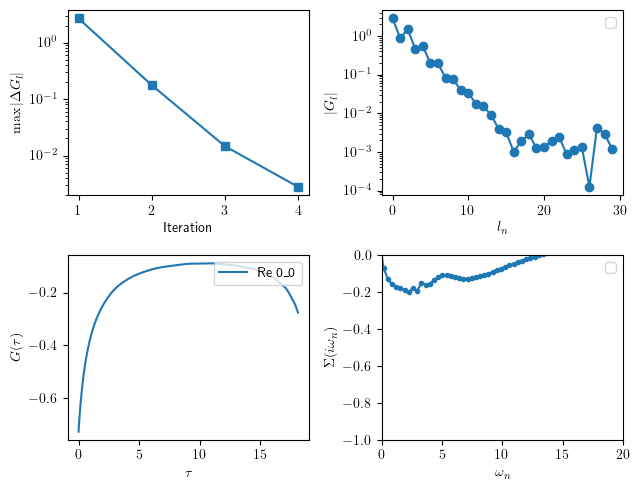

In [9]:
plot_DMFT_test(ps_ML)

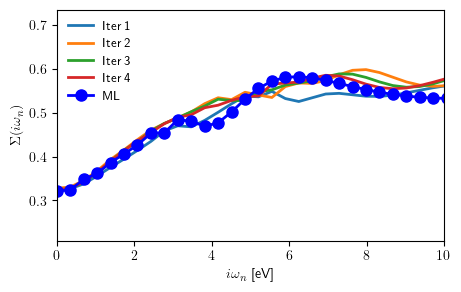

In [11]:
plot_Sigma_Re(sample.ps_exact, ps_ML)

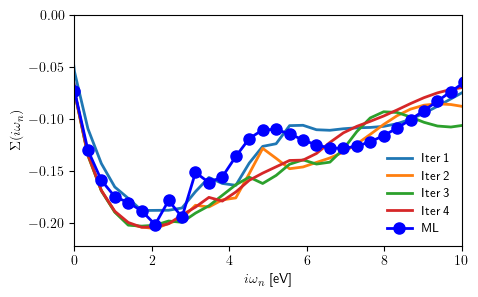

In [22]:
plot_Sigma_Ex_ML_Both(sample.ps_exact, ps_ML)
# plot_Sigma_Ex_ML_Both(sample.ps_exact, ps_ML_v3)

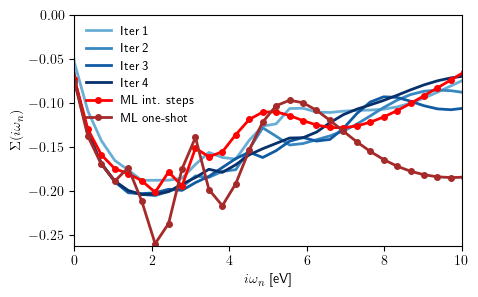

In [42]:
plot_Sigma_Ex_ML_v3v4(sample.ps_exact, ps_ML_v3, ps_ML )

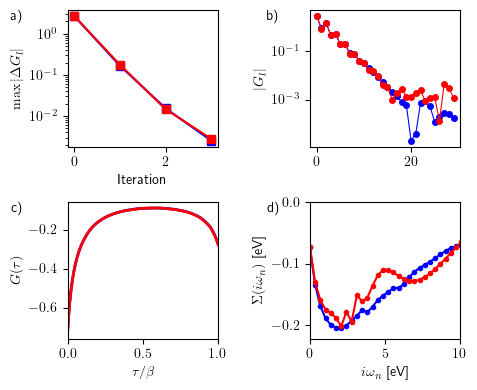

In [43]:
plot_DMFT_compare(sample.ps_exact, ps_ML)

# Z

In [44]:
Zex = np.array([1.06205747, 1.06205747, 1.06205747, 1.06205747, 1.06205747,
       1.06205747, 1.04491661, 1.04491661, 1.04491661, 1.04491661,
       1.16493227, 1.16493227, 1.16493227, 1.16493227, 1.07564878,
       1.07564878, 1.07564878, 1.07564878, 1.03876773, 1.03876773,
       1.03876773, 1.03876773, 1.03876773, 1.00157826, 1.00157826,
       1.00157826, 1.00157826, 1.07641539, 1.07641539, 1.07641539,
       1.07641539, 1.0399062 , 1.0399062 , 1.0399062 , 1.0399062 ,
       1.08896485, 1.08896485, 1.08896485, 1.08896485, 1.08896485,
       1.13955712, 1.13955712, 1.13955712, 1.13955712, 1.02817684,
       1.02817684, 1.02817684, 1.02817684, 1.10774859, 1.10774859,
       1.10774859, 1.10774859, 1.05135912, 1.05135912, 1.05135912,
       1.05135912, 1.15578565, 1.15578565, 1.15578565, 1.15578565,
       1.12964996, 1.12964996, 1.12964996, 1.12964996, 1.04434354,
       1.04434354, 1.04434354, 1.04434354, 1.04929039, 1.04929039,
       1.04929039, 1.04929039, 1.04929039, 1.19570158, 1.19570158,
       1.19570158, 1.19570158, 1.21546467, 1.21546467, 1.21546467,
       1.00144564, 1.00144564, 1.00144564, 1.00144564, 1.00144564,
       1.23364919, 1.23364919, 1.23364919, 1.23364919, 1.23364919,
       1.06364437, 1.06364437, 1.06364437, 1.06364437, 1.06364437,
       1.11900797, 1.11900797, 1.11900797, 1.11900797, 1.11900797,
       1.16983178, 1.16983178, 1.16983178, 1.16983178, 1.16983178,
       1.01620031, 1.01620031, 1.01620031, 1.04709529, 1.04709529,
       1.04709529, 1.04709529, 1.18504906, 1.18504906, 1.18504906,
       1.18504906, 1.10608074, 1.10608074, 1.10608074, 1.10608074,
       1.10608074, 1.10613397, 1.10613397, 1.10613397, 1.10613397,
       1.21072298, 1.21072298, 1.21072298, 1.01686152, 1.01686152,
       1.01686152, 1.09834234, 1.09834234, 1.09834234, 1.09834234,
       1.04868257, 1.04868257, 1.04868257, 1.04868257, 1.06417701,
       1.06417701, 1.06417701, 1.06417701, 1.15192294, 1.15192294,
       1.15192294, 1.15192294, 1.15192294, 1.09066133, 1.09066133,
       1.09066133, 1.09066133, 1.09066133, 1.07651001, 1.07651001,
       1.07651001, 1.07651001, 1.07651001, 1.18497044, 1.18497044,
       1.18497044, 1.18497044, 1.14192417, 1.14192417, 1.14192417,
       1.14192417, 1.14192417, 1.01332859, 1.01332859, 1.01332859,
       1.1264097 , 1.1264097 , 1.1264097 , 1.1264097 , 1.1264097 ,
       1.1264097 , 1.14007902, 1.14007902, 1.14007902, 1.14007902,
       1.14007902, 1.14007902, 1.04214734, 1.04214734, 1.04214734,
       1.04214734, 1.04371714, 1.04371714, 1.04371714, 1.04371714,
       1.02482895, 1.02482895, 1.02482895, 1.02482895, 1.19522619,
       1.19522619, 1.19522619, 1.19522619, 1.19522619, 1.1362721 ,
       1.1362721 , 1.1362721 , 1.1362721 , 1.1362721 , 1.09114979,
       1.09114979, 1.09114979, 1.09114979, 1.09114979, 1.07624733,
       1.07624733, 1.07624733, 1.07624733, 1.07624733, 1.03672106,
       1.03672106, 1.03672106, 1.09386801, 1.09386801, 1.09386801,
       1.09386801, 1.09386801, 1.06111618, 1.06111618, 1.06111618,
       1.06111618, 1.08568114, 1.08568114, 1.08568114, 1.08568114,
       1.08568114, 1.08568114, 1.01807491, 1.01807491, 1.01807491,
       1.01807491, 1.01807491, 1.1715723 , 1.1715723 , 1.1715723 ,
       1.1715723 , 1.1715723 , 1.20158067, 1.20158067, 1.20158067,
       1.20158067, 1.04552161, 1.04552161, 1.04552161, 1.04552161,
       1.11956921, 1.11956921, 1.11956921, 1.11956921, 1.11956921,
       1.05346359, 1.05346359, 1.05346359, 1.05346359, 1.01655966,
       1.01655966, 1.01655966, 1.01655966, 1.14497588, 1.14497588,
       1.14497588, 1.14497588, 1.14497588, 1.08385159, 1.08385159,
       1.08385159, 1.08385159, 1.08385159, 1.14701318, 1.14701318,
       1.14701318, 1.14701318, 1.14701318, 1.18314505, 1.18314505,
       1.18314505, 1.18314505, 1.18314505, 1.19253339, 1.19253339,
       1.19253339, 1.15936854, 1.15936854, 1.15936854, 1.15936854,
       1.12065769, 1.12065769, 1.12065769, 1.1505692 , 1.1505692 ,
       1.1505692 , 1.1505692 , 1.1505692 , 1.03624482, 1.03624482,
       1.03624482, 1.03624482, 1.0807595 , 1.0807595 , 1.0807595 ,
       1.0807595 , 1.0807595 , 1.1629307 , 1.1629307 , 1.1629307 ,
       1.1629307 , 1.09125462, 1.09125462, 1.09125462, 1.09125462,
       1.09125462, 1.09488542, 1.09488542, 1.09488542, 1.09488542,
       1.09488542, 1.09488542, 1.10688018, 1.10688018, 1.10688018,
       1.10688018, 1.10688018, 1.10688018, 1.12930233, 1.12930233,
       1.12930233, 1.12930233, 1.12930233, 1.1166488 , 1.1166488 ,
       1.1166488 , 1.1166488 , 1.1166488 , 1.1166488 , 1.10292659,
       1.10292659, 1.10292659, 1.10292659, 1.10292659, 1.08497876,
       1.08497876, 1.08497876, 1.08497876, 1.08497876, 1.04251695,
       1.04251695, 1.04251695, 1.15811909, 1.15811909, 1.15811909,
       1.15811909, 1.15811909, 1.04913062, 1.04913062, 1.04913062,
       1.04913062, 1.04913062, 0.99161481, 0.99161481, 0.99161481,
       0.99161481, 0.99161481, 0.99161481, 0.99161481, 1.1497141 ,
       1.1497141 , 1.1497141 , 1.1497141 , 1.1497141 , 1.04306894,
       1.04306894, 1.04306894, 1.21547881, 1.21547881, 1.21547881,
       1.21547881, 1.07565936, 1.07565936, 1.07565936, 1.07565936,
       1.07565936, 1.17385316, 1.17385316, 1.17385316, 1.17385316,
       1.17385316, 1.09596711, 1.09596711, 1.09596711, 1.09596711,
       1.09596711, 1.01864003, 1.01864003, 1.01864003, 1.01864003,
       1.0251598 , 1.0251598 , 1.0251598 , 1.0251598 , 1.0251598 ,
       1.15620543, 1.15620543, 1.15620543, 1.0248068 , 1.0248068 ,
       1.0248068 , 1.06996776, 1.06996776, 1.06996776, 1.06996776,
       1.06996776, 1.10286062, 1.10286062, 1.10286062, 1.10286062,
       1.18924506, 1.18924506, 1.18924506, 1.18924506, 1.17393417,
       1.17393417, 1.17393417, 1.04426654, 1.04426654, 1.04426654,
       1.04426654, 1.0578358 , 1.0578358 , 1.0578358 , 1.0578358 ,
       1.0278539 , 1.0278539 , 1.0278539 , 1.0278539 , 1.13312483,
       1.13312483, 1.13312483, 1.13312483])

Zml = np.array([1.05456725, 1.05456725, 1.05456725, 1.05456725, 1.05456725,
       1.05456725, 1.05200716, 1.05200716, 1.05200716, 1.05200716,
       1.15821108, 1.15821108, 1.15821108, 1.15821108, 1.07491662,
       1.07491662, 1.07491662, 1.07491662, 1.04681116, 1.04681116,
       1.04681116, 1.04681116, 1.04681116, 0.97266512, 0.97266512,
       0.97266512, 0.97266512, 1.06885301, 1.06885301, 1.06885301,
       1.06885301, 1.04205943, 1.04205943, 1.04205943, 1.04205943,
       1.08329324, 1.08329324, 1.08329324, 1.08329324, 1.08329324,
       1.1246581 , 1.1246581 , 1.1246581 , 1.1246581 , 1.03755079,
       1.03755079, 1.03755079, 1.03755079, 1.10105385, 1.10105385,
       1.10105385, 1.10105385, 1.06152606, 1.06152606, 1.06152606,
       1.06152606, 1.13723574, 1.13723574, 1.13723574, 1.13723574,
       1.13242723, 1.13242723, 1.13242723, 1.13242723, 1.06128577,
       1.06128577, 1.06128577, 1.06128577, 1.05444473, 1.05444473,
       1.05444473, 1.05444473, 1.05444473, 1.21003369, 1.21003369,
       1.21003369, 1.21003369, 1.23866072, 1.23866072, 1.23866072,
       0.97785343, 0.97785343, 0.97785343, 0.97785343, 0.97785343,
       1.22392599, 1.22392599, 1.22392599, 1.22392599, 1.22392599,
       1.06610677, 1.06610677, 1.06610677, 1.06610677, 1.06610677,
       1.12277074, 1.12277074, 1.12277074, 1.12277074, 1.12277074,
       1.1749795 , 1.1749795 , 1.1749795 , 1.1749795 , 1.1749795 ,
       1.04329031, 1.04329031, 1.04329031, 1.04047984, 1.04047984,
       1.04047984, 1.04047984, 1.17239612, 1.17239612, 1.17239612,
       1.17239612, 1.10823657, 1.10823657, 1.10823657, 1.10823657,
       1.10823657, 1.12589027, 1.12589027, 1.12589027, 1.12589027,
       1.24600948, 1.24600948, 1.24600948, 1.01383548, 1.01383548,
       1.01383548, 1.10925149, 1.10925149, 1.10925149, 1.10925149,
       1.04925697, 1.04925697, 1.04925697, 1.04925697, 1.06582236,
       1.06582236, 1.06582236, 1.06582236, 1.15187782, 1.15187782,
       1.15187782, 1.15187782, 1.15187782, 1.09694094, 1.09694094,
       1.09694094, 1.09694094, 1.09694094, 1.07633998, 1.07633998,
       1.07633998, 1.07633998, 1.07633998, 1.168866  , 1.168866  ,
       1.168866  , 1.168866  , 1.14229459, 1.14229459, 1.14229459,
       1.14229459, 1.14229459, 1.02718155, 1.02718155, 1.02718155,
       1.11383305, 1.11383305, 1.11383305, 1.11383305, 1.11383305,
       1.11383305, 1.13116954, 1.13116954, 1.13116954, 1.13116954,
       1.13116954, 1.13116954, 1.05202312, 1.05202312, 1.05202312,
       1.05202312, 1.05524673, 1.05524673, 1.05524673, 1.05524673,
       1.03287743, 1.03287743, 1.03287743, 1.03287743, 1.20280452,
       1.20280452, 1.20280452, 1.20280452, 1.20280452, 1.12963401,
       1.12963401, 1.12963401, 1.12963401, 1.12963401, 1.09735192,
       1.09735192, 1.09735192, 1.09735192, 1.09735192, 1.06306692,
       1.06306692, 1.06306692, 1.06306692, 1.06306692, 1.0473201 ,
       1.0473201 , 1.0473201 , 1.08224587, 1.08224587, 1.08224587,
       1.08224587, 1.08224587, 1.06412116, 1.06412116, 1.06412116,
       1.06412116, 1.09239529, 1.09239529, 1.09239529, 1.09239529,
       1.09239529, 1.09239529, 1.01741051, 1.01741051, 1.01741051,
       1.01741051, 1.01741051, 1.16827754, 1.16827754, 1.16827754,
       1.16827754, 1.16827754, 1.22906999, 1.22906999, 1.22906999,
       1.22906999, 1.0558669 , 1.0558669 , 1.0558669 , 1.0558669 ,
       1.146591  , 1.146591  , 1.146591  , 1.146591  , 1.146591  ,
       1.06045212, 1.06045212, 1.06045212, 1.06045212, 1.02962317,
       1.02962317, 1.02962317, 1.02962317, 1.14298737, 1.14298737,
       1.14298737, 1.14298737, 1.14298737, 1.0745517 , 1.0745517 ,
       1.0745517 , 1.0745517 , 1.0745517 , 1.13062163, 1.13062163,
       1.13062163, 1.13062163, 1.13062163, 1.21424811, 1.21424811,
       1.21424811, 1.21424811, 1.21424811, 1.21787963, 1.21787963,
       1.21787963, 1.13512227, 1.13512227, 1.13512227, 1.13512227,
       1.12299095, 1.12299095, 1.12299095, 1.14166044, 1.14166044,
       1.14166044, 1.14166044, 1.14166044, 1.04774382, 1.04774382,
       1.04774382, 1.04774382, 1.0744783 , 1.0744783 , 1.0744783 ,
       1.0744783 , 1.0744783 , 1.1785153 , 1.1785153 , 1.1785153 ,
       1.1785153 , 1.08087491, 1.08087491, 1.08087491, 1.08087491,
       1.08087491, 1.08911325, 1.08911325, 1.08911325, 1.08911325,
       1.08911325, 1.08911325, 1.11541831, 1.11541831, 1.11541831,
       1.11541831, 1.11541831, 1.11541831, 1.12492454, 1.12492454,
       1.12492454, 1.12492454, 1.12492454, 1.13114125, 1.13114125,
       1.13114125, 1.13114125, 1.13114125, 1.13114125, 1.10336059,
       1.10336059, 1.10336059, 1.10336059, 1.10336059, 1.07815371,
       1.07815371, 1.07815371, 1.07815371, 1.07815371, 1.05902933,
       1.05902933, 1.05902933, 1.14262173, 1.14262173, 1.14262173,
       1.14262173, 1.14262173, 1.07223143, 1.07223143, 1.07223143,
       1.07223143, 1.07223143, 1.06867523, 1.06867523, 1.06867523,
       1.06867523, 1.06867523, 1.06867523, 1.06867523, 1.15264571,
       1.15264571, 1.15264571, 1.15264571, 1.15264571, 1.04463194,
       1.04463194, 1.04463194, 1.24604147, 1.24604147, 1.24604147,
       1.24604147, 1.09966668, 1.09966668, 1.09966668, 1.09966668,
       1.09966668, 1.17796506, 1.17796506, 1.17796506, 1.17796506,
       1.17796506, 1.08090195, 1.08090195, 1.08090195, 1.08090195,
       1.08090195, 1.02031419, 1.02031419, 1.02031419, 1.02031419,
       1.03447432, 1.03447432, 1.03447432, 1.03447432, 1.03447432,
       1.15621161, 1.15621161, 1.15621161, 1.03625167, 1.03625167,
       1.03625167, 1.07484078, 1.07484078, 1.07484078, 1.07484078,
       1.07484078, 1.09121374, 1.09121374, 1.09121374, 1.09121374,
       1.17655149, 1.17655149, 1.17655149, 1.17655149, 1.18705319,
       1.18705319, 1.18705319, 1.0462586 , 1.0462586 , 1.0462586 ,
       1.0462586 , 1.0474049 , 1.0474049 , 1.0474049 , 1.0474049 ,
       1.00948065, 1.00948065, 1.00948065, 1.00948065, 1.1445319 ,
       1.1445319 , 1.1445319 , 1.1445319 ])

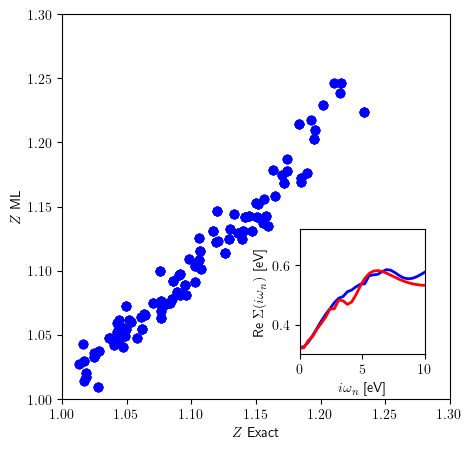

In [46]:
fig, ax = plt.subplots( figsize=(5, 5))

ax.scatter(Zex, Zml, color='blue')
ax.set_ylabel(r'$Z$ ML')
ax.set_xlabel(r'$Z$ Exact')
ax.set_xlim([1, 1.3])
ax.set_ylim([1, 1.3])


inset_ax = fig.add_axes([0.6, 0.2, 0.25, 0.25])  # [left, bottom, width, height]
# inset_ax.scatter(Zex, Zml, color='blue')
# inset_ax.set_xlim([1.05, 1.15])
# inset_ax.set_ylim([1.05, 1.15])

ps_Exact = sample.ps_exact
ss = np.imag(ps_ML[-1].sigma_w.data.flatten())
ll = len(ss)//2
beta = ps_Exact[-1].init.beta
inset_ax.plot(np.arange(-ll, ll, 1)*6.28/beta, np.real(ps_Exact[-1].sigma_w.data.flatten()), markersize=0, linewidth=2, c='b')
inset_ax.plot(np.arange(-ll, ll, 1)*6.28/beta, np.real(ps_ML[-1].sigma_w.data.flatten()), 'o-', markersize=0, linewidth=2, c='r', label='ML')
inset_ax.set_ylabel(r'Re $\Sigma(i\omega_n)$ [eV]')
inset_ax.set_xlim([0, 10])
inset_ax.set_xlabel(r'$i\omega_n$ [eV]')
plt.savefig('./pics/Z.pdf' , dpi=200, bbox_inches='tight')
